# 4.3 示例案例

## 4.3.1 调用示例

### （1）多层神经网络

D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


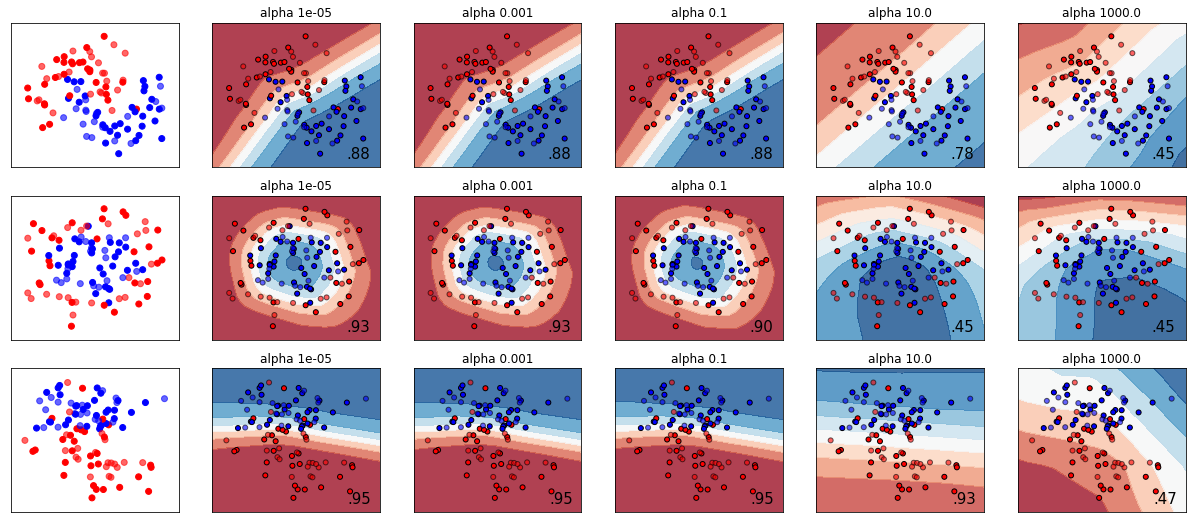

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

### （2）支持向量机

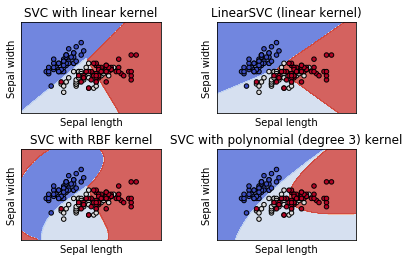

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 4.3.2 分析示例

### （1） 多层神经网络的特征变换过程（Relu）

score =  0.982


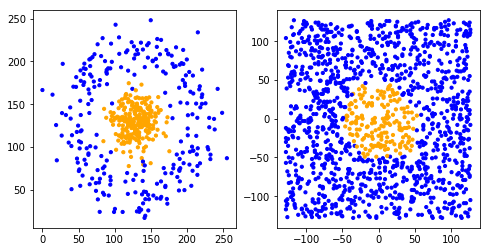

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from matplotlib.animation import FuncAnimation

def MaxMinNormalization(x):  
    x = (x - np.min(x)) / (np.max(x) - np.min(x)) 
    return x

def datasetC(n):
    np.random.seed(0)
    x,y= datasets.make_circles(n_samples=n, factor=0.05, noise=.2)
    X=255*MaxMinNormalization(x)
    Y=y;Y[Y==0]=-1
    return X,Y

def meshgrid():
    a = np.linspace(0,255,256);b = np.linspace(0,255,256)
    [Xa,Yb] = np.meshgrid(a,b)
    points = [point for point in zip(Xa.flat,Yb.flat)]; np.random.shuffle(points)
    P=np.array(points)
    return P

cm_bright = ListedColormap(['Blue', 'Orange'])

if __name__ == '__main__':
    f, axs = plt.subplots(1,2,figsize=(8,4))
    plt.subplot(121)
    X,Y=datasetC(500)
    plt.scatter(X[:,0], X[:,1], s=10, c=Y, cmap=cm_bright)
    plt.xticks();plt.yticks()
    #plt.savefig('D:\VisualNN\Cdataset.png',format='png',transparent=True,dpi=300);plt.close()
    
    plt.subplot(122)
    X=X-128
    P=meshgrid();P=P-128;t=0.02;P=np.array(P);P=P[0:int(t*65536)]
    clf =MLPClassifier(hidden_layer_sizes=(3,2),activation='relu',solver='lbfgs',learning_rate_init=0.3,max_iter=2000)
    clf.fit(X, Y);print('score = ',clf.score(X, Y))
    pd=clf.predict(P)
    w=clf.coefs_
    b=clf.intercepts_
    plt.scatter(P[:,0], P[:,1], s=10, c=pd, cmap=cm_bright)
    plt.xticks();plt.yticks()

In [4]:
    ip1=np.dot(  P,w[0])+b[0];  op1=ip1.copy();op1[op1<0]=0;
    ip2=np.dot(op1,w[1])+b[1];  op2=ip2.copy();op2[op2<0]=0;
    ip3=np.dot(op2,w[2])+b[2];  op3=ip3.copy();op3[op3<0]=0;

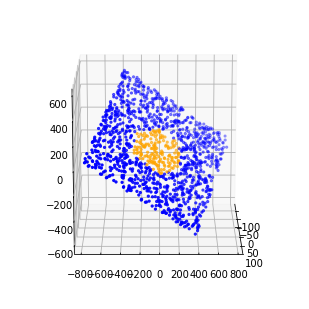

In [5]:
    fig = plt.figure(figsize=(4, 4))
    def update(i):
        ax = Axes3D(fig, elev=15, azim=i)
        ax.scatter(ip1[:,0],ip1[:,1],ip1[:,2], s=5, c=pd, cmap=ListedColormap(['Blue', 'Orange']))
        return ax
    i=np.hstack((range(0,90,5),range(90,0,-5)))
    animation = FuncAnimation(fig, update, i,  interval=100)

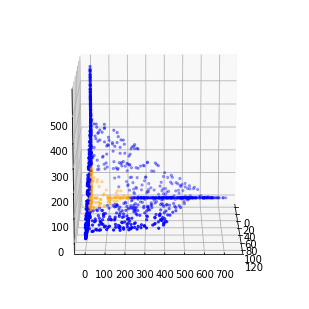

In [6]:
    fig = plt.figure(figsize=(4, 4))
    def update(i):
        ax = Axes3D(fig, elev=15, azim=i)
        ax.scatter(op1[:,0],op1[:,1],op1[:,2], s=5, c=pd, cmap=ListedColormap(['Blue', 'Orange']))
        return ax
    i=np.hstack((range(0,90,5),range(90,0,-5)))
    animation = FuncAnimation(fig, update, i,  interval=100)

(-1200, 390)

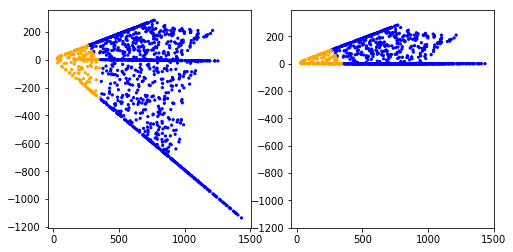

In [7]:
    f, axs = plt.subplots(1,2,figsize=(8,4))
    fig = plt.subplot(121)
    plt.scatter(ip2[:,0], ip2[:,1], s=5, c=pd, cmap=ListedColormap(['Blue', 'Orange']))
    
    fig = plt.subplot(122)
    plt.scatter(op2[:,0], op2[:,1], s=5, c=pd, cmap=ListedColormap(['Blue', 'Orange']))
    plt.ylim(-1200,390)

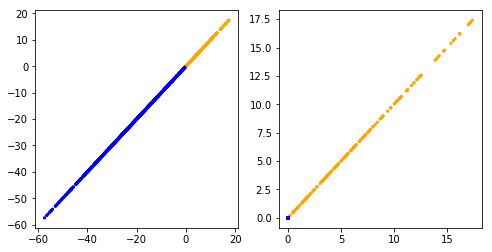

In [8]:
    f, axs = plt.subplots(1,2,figsize=(8,4))
    fig = plt.subplot(121)
    plt.scatter(ip3[:,0], ip3[:,0], s=5, c=pd, cmap=ListedColormap(['Blue', 'Orange']))
    
    fig = plt.subplot(122)
    plt.scatter(op3[:,0], op3[:,0], s=5, c=pd, cmap=ListedColormap(['Blue', 'Orange']))

### （2）SVM的分类过程（高斯核函数）

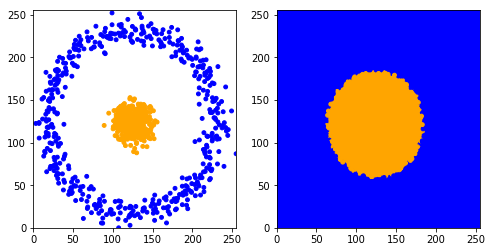

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
import math
def MaxMinNormalization(x):  
    x = (x - np.min(x)) / (np.max(x) - np.min(x));  
    return x;
def datasetM(n):
    np.random.seed(0)
    x,y = datasets.make_moons(n, noise=0.10)
    X=255*MaxMinNormalization(x)
    Y=y;Y[Y==0]=-1
    return X,Y
def datasetC(n):
    np.random.seed(0)
    x,y= datasets.make_circles(n_samples=n, factor=0.1, noise=.08, random_state=2)
    X=255*MaxMinNormalization(x);
    Y=y;Y[Y==0]=-1
    return X,Y
def datasetB(n):
    np.random.seed(0)
    x,y=datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=.8, random_state=2)
    X=255*MaxMinNormalization(x)
    Y=y;Y[Y==0]=-1             
    return X,Y
def meshgrid():
    a = np.linspace(0,255,256);b = np.linspace(0,255,256)
    [Xa,Yb] = np.meshgrid(a,b)
    points = [point for point in zip(Xa.flat,Yb.flat)]; np.random.shuffle(points)
    P=np.array(points)
    return P
def scatterD(X,Y):
    cm_bright = ListedColormap(['Blue', 'Orange']);
    plt.scatter(X[:,0], X[:,1], s=15, c=Y, cmap=cm_bright)
    plt.xlim(0,255);plt.ylim(0,255)
    #plt.xticks(());plt.yticks(())
def scatterC(P,pd):
    cm = plt.cm.get_cmap('RdBu_r')
    sc=plt.scatter(P[:,0], P[:,1], s=1, c=pd, cmap=cm)
    return sc
def rbfK(X,y,sig):
    Kear=[];
    for i in range(len(X)):
        Xx=X[i][0];  Xy=X[i][1]
        deltx=Xx-y[0]; delty=Xy-y[1];
        fenmu=math.pow(deltx,2)+math.pow(delty,2)
        fenzi=-2*math.pow(sig,2)
        tempK=math.exp(fenmu/fenzi)
        Kear.append(tempK)
    return Kear;
def precomputedK(X,y,sig):
    Kear=[];
    for i in range(len(X)):
        Xx=X[i][0];  Xy=X[i][1] 
        deltx=Xx-y[0]; delty=Xy-y[1];
        fenmu=math.sqrt(math.pow(deltx,2)+math.pow(delty,2))
        fenzi=-sig
        tempK=math.exp(fenmu/fenzi)
        Kear.append(tempK)
    return Kear;
def npmax(x,y):
    z=[]
    for i in range(len(x)):
        if x[i]>y[i]:
            z.append(x[i])
        else:
            z.append(y[i])
    return z

plt.figure(figsize=(8,4));P=meshgrid()
X,Y=datasetC(n=1000);P=P[0:int(1*65536)]
plt.subplot(121);scatterD(X,Y)
from sklearn import svm
clf=svm.SVC(kernel='rbf',gamma=0.0001);
clf.fit(X,Y);
ps=clf.predict(P);
plt.subplot(122);scatterD(P,ps)

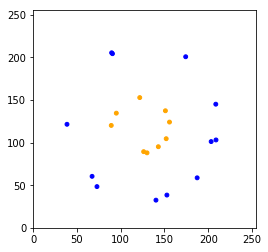

In [10]:
sv=clf.support_vectors_;svi=clf.support_
svy=clf.predict(sv);
plt.figure(figsize=(4,4));
scatterD(sv,svy)

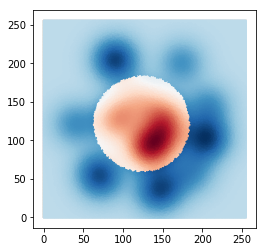

In [11]:
a=clf.dual_coef_.T
b=clf.intercept_ 
for i in range(len(a)):
    ps[svi[i]]=a[i]
s=np.zeros((len(P),))

plt.figure(figsize=(4,4));
for i in range(len(sv)):
    K=rbfK(P,sv[i],20)*ps+b
    s=K+s
    scatterC(P,s)